In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

**2.Reading and Exploring the Data**

In [3]:
data= pd.read_csv('../ml-25m/movies.csv')
# select random sample of 1000 movies by fixing random seed
random.seed(1773)
sample = data.sample(n=1000)
data.shape

(62423, 3)

In [4]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
movies = data['movieId'].unique().tolist()
len(movies)

62423

In [7]:
ratings_data=pd.read_csv('../ml-25m/ratings.csv',sep=',')
# select random sample of 1000 movies by fixing random seed
sample = ratings_data.sample(n=1000)
ratings_data.shape

(25000095, 4)

In [8]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [9]:
ratings_data['rating'].min() 

0.5

In [10]:
ratings_data['rating'].max()

5.0

**3.Cleaning of data**

In [11]:
data.shape

(62423, 3)

In [12]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [13]:
ratings_data.shape

(25000095, 4)

In [14]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [15]:
tags_data=pd.read_csv('../ml-25m/tags.csv',sep=',')
tags_data.shape

(1093360, 4)

In [16]:
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [17]:
tags_data=tags_data.dropna()

In [18]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [19]:
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)


73050

**4.Data Analysis**

In [20]:
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [21]:
drama_movies.shape

(62423,)

In [22]:
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [23]:
comedy_movies.shape

(62423,)

In [24]:
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
2,4,1732,dark comedy,1573943598
610,113,608,dark comedy,1478897216
625,150,104879,dark,1422348976
645,187,91007,dark,1427089602
674,220,151367,dark humor,1453320837


In [25]:
ratings_data.head() 

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [26]:
del ratings_data['timestamp']

In [27]:
ratings_data.head() 

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [28]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0


In [30]:
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,5.0
22,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,86,5.0
26,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,90,5.0
27,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,93,5.0
28,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,95,5.0
29,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,96,5.0
30,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,98,5.0
33,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,111,4.5
35,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,120,5.0


In [31]:
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,3.0


In [32]:
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1639

In [33]:
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Forrest Gump (1994)                                                               81491
Shawshank Redemption, The (1994)                                                  81482
Pulp Fiction (1994)                                                               79672
Silence of the Lambs, The (1991)                                                  74127
Matrix, The (1999)                                                                72674
Star Wars: Episode IV - A New Hope (1977)                                         68717
Jurassic Park (1993)                                                              64144
Schindler's List (1993)                                                           60411
Braveheart (1995)                                                                 59184
Fight Club (1999)                                                                 58773
Terminator 2: Judgment Day (1991)                                                 57379
Star Wars: Episode V - The

In [34]:
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [35]:
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

<>:1: DeprecationWarning: invalid escape sequence \(
<>:1: DeprecationWarning: invalid escape sequence \(
/tmp/ipykernel_4473/2978752815.py:1: DeprecationWarning: invalid escape sequence \(
  data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [36]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [37]:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [38]:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348],
 ['Horror', 5989],
 ['Documentary', 5605],
 ['Crime', 5319],
 ['(no genres listed)', 5062],
 ['Adventure', 4145],
 ['Sci-Fi', 3595],
 ['Children', 2935],
 ['Animation', 2929],
 ['Mystery', 2925],
 ['Fantasy', 2731],
 ['War', 1874],
 ['Western', 1399],
 ['Musical', 1054],
 ['Film-Noir', 353],
 ['IMAX', 195]]

**5.Data Visualization**

/home/mustafa/anaconda3/envs/myenv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


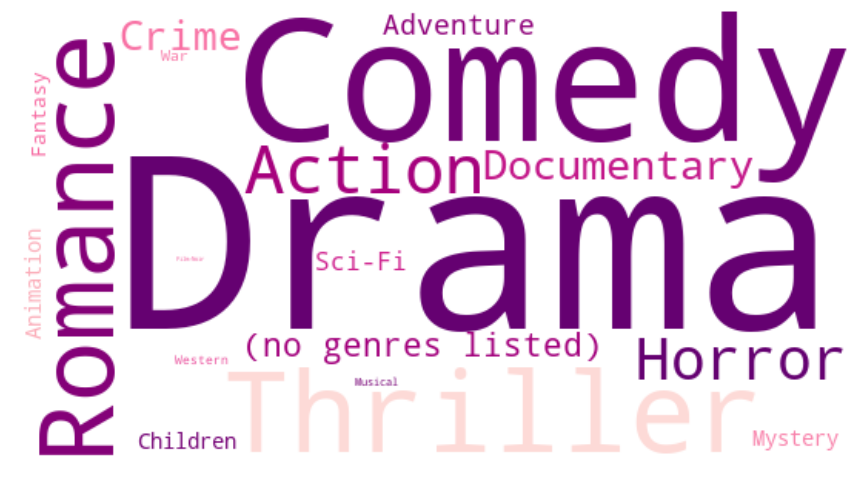

In [39]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False, colormap='RdPu')
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

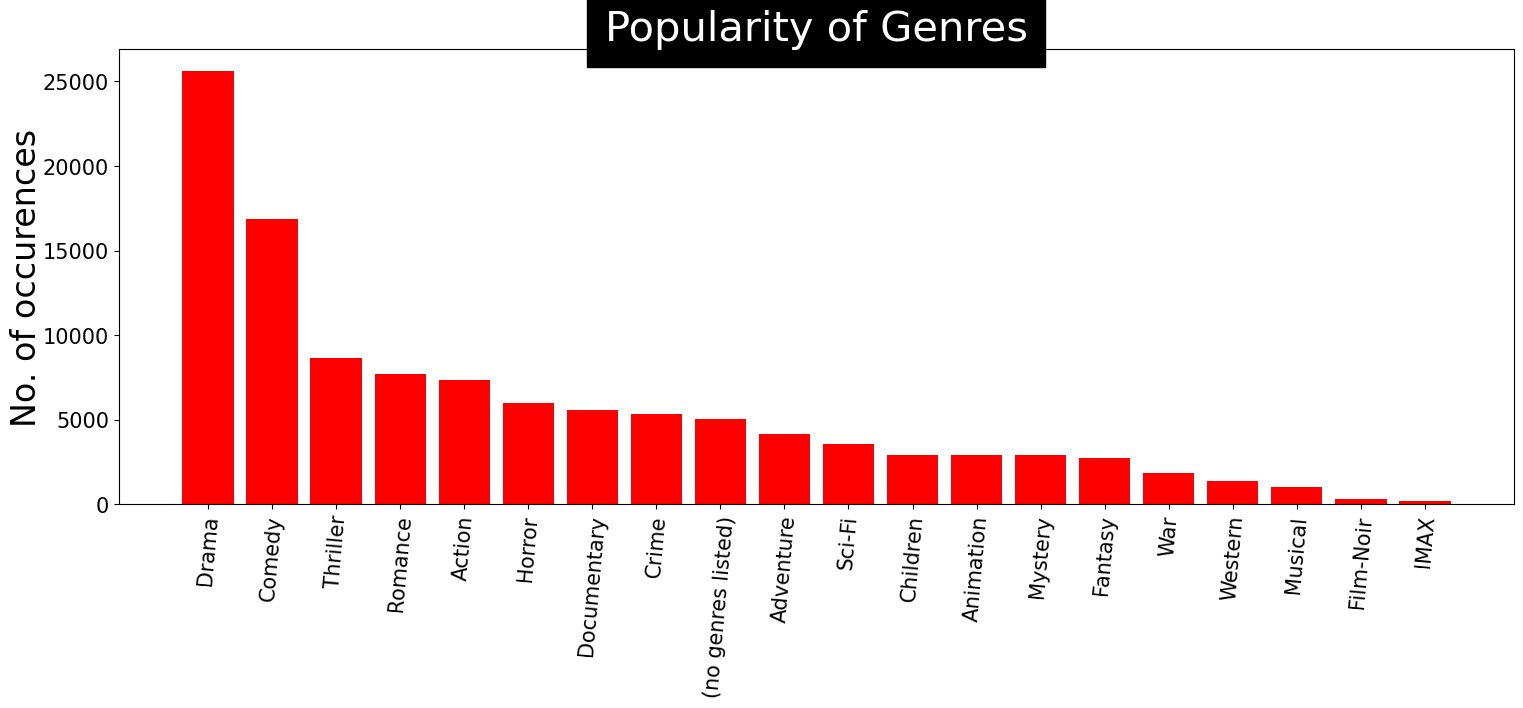

In [40]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

**Creating User Based Table**

In [49]:
# Group movies_data_ratings_data by userId and create a new column called watched_movies which contains name of all movies watched by the user
movie_data_ratings_data_grouped_by_userId = movie_data_ratings_data.groupby("userId")
movie_data_ratings_data_grouped_by_userId = movie_data_ratings_data_grouped_by_userId["title"].apply(list).reset_index(name="watched_movies")
movie_data_ratings_data_grouped_by_userId.head()
# Create a new dataframe which contains encoded watched_movies column
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
movie_data_ratings_data_grouped_by_userId = movie_data_ratings_data_grouped_by_userId.iloc[:1000] # to reduce the size of dataframe to 1000 rows
movie_data_ratings_data_encoded = movie_data_ratings_data_grouped_by_userId.join(pd.DataFrame(mlb.fit_transform(movie_data_ratings_data_grouped_by_userId.pop('watched_movies')),
                          columns=mlb.classes_,
                          index=movie_data_ratings_data_grouped_by_userId.index))


In [62]:
movie_data_ratings_data_encoded.iloc[1].value_counts()

1
0    11733
1      184
2        1
Name: count, dtype: int64

In [63]:
movie_data_ratings_data_encoded

,userId,$5 a Day (2008),'71 (2014),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Dis)Honesty: The Truth About Lies (2015),...,¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),В движении (2002),Кентервильское привидение (1970),Когда зажигаются ёлки (1950),Ландыш серебристый (2000),Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977)
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,997,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
997,998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,999,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
sampled_data = movie_data_ratings_data_grouped_by_userId.sample(frac=0.25, random_state=42)
frequent_itemsets = apriori(movie_data_ratings_data_encoded.drop(columns=["userId"]), min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules)

/home/mustafa/anaconda3/envs/myenv/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                              antecedents  \
0                          (2001: A Space Odyssey (1968))   
1                          (2001: A Space Odyssey (1968))   
2                          (2001: A Space Odyssey (1968))   
3                          (2001: A Space Odyssey (1968))   
4                          (2001: A Space Odyssey (1968))   
...                                                   ...   
129675  (Star Wars: Episode VI - Return of the Jedi (1...   
129676  (Pulp Fiction (1994), Matrix, The (1999), Star...   
129677  (Shawshank Redemption, The (1994), Matrix, The...   
129678  (Pulp Fiction (1994), Matrix, The (1999), Star...   
129679  (Shawshank Redemption, The (1994), Pulp Fictio...   

                                              consequents  antecedent support  \
0                                   (Blade Runner (1982))               0.152   
1                                    (Matrix, The (1999))               0.152   
2                       

In [69]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2001: A Space Odyssey (1968)),(Blade Runner (1982)),0.152,0.214,0.107,0.703947,3.289474,0.074472,2.654933,0.820755
1,(2001: A Space Odyssey (1968)),"(Matrix, The (1999))",0.152,0.424,0.109,0.717105,1.691286,0.044552,2.036093,0.481998
2,(2001: A Space Odyssey (1968)),(Pulp Fiction (1994)),0.152,0.477,0.110,0.723684,1.517158,0.037496,1.892762,0.401973
3,(2001: A Space Odyssey (1968)),(Star Wars: Episode IV - A New Hope (1977)),0.152,0.403,0.117,0.769737,1.910017,0.055744,2.592686,0.561845
4,(2001: A Space Odyssey (1968)),(Star Wars: Episode V - The Empire Strikes Bac...,0.152,0.343,0.122,0.802632,2.340034,0.069864,3.328800,0.675302


In [73]:
rules["confidence"].min()

0.7